In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/simonbruun-simonsen/Desktop/ML-project/data/claims_train.csv")

In [28]:
df1 = pd.read_csv("/Users/simonbruun-simonsen/Desktop/ML-project/data/claims_train.csv")
df1.duplicated(subset="IDpol")

0         False
1         False
2         False
3         False
4         False
          ...  
542405    False
542406    False
542407    False
542408    False
542409    False
Length: 542410, dtype: bool

In [3]:
columns_to_drop = ["IDpol"]

In [4]:
df = df.drop(axis=1,columns=columns_to_drop)

In [5]:
df = df[df['Exposure'] <= 1]

df['Exposure'] = df['Exposure'].round(2)


<Axes: xlabel='ClaimNb', ylabel='Count'>

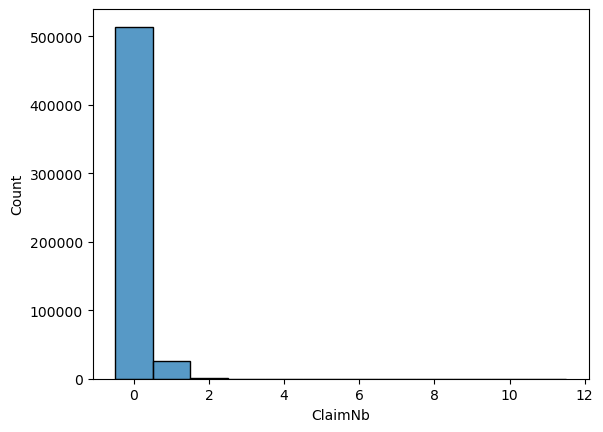

In [6]:
sns.histplot(df["ClaimNb"], bins=range(df["ClaimNb"].max()+2), discrete=True)


<Axes: xlabel='Density', ylabel='Count'>

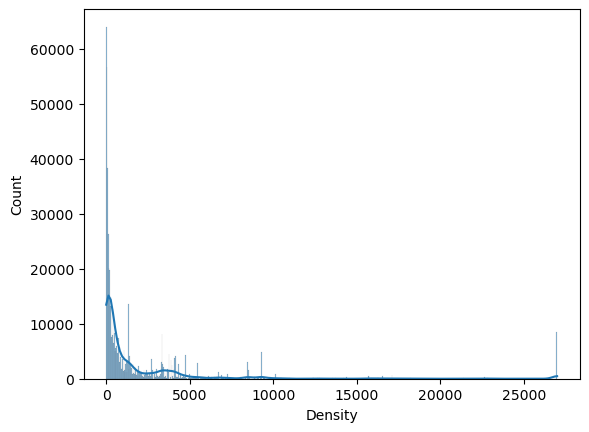

In [7]:
sns.histplot(df["Density"], kde=True)
#sns.histplot(df["Exposure"], kde=True)

<Axes: xlabel='Exposure', ylabel='Count'>

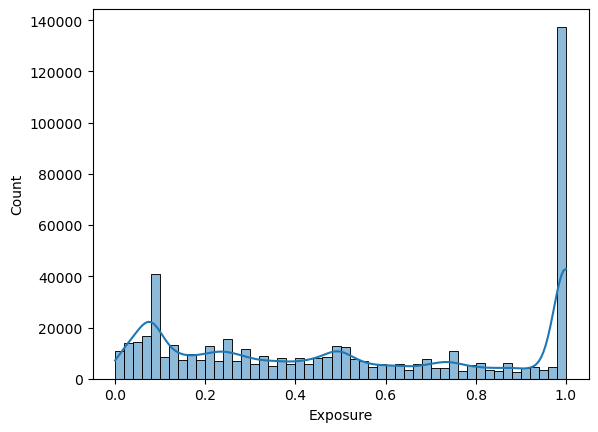

In [8]:
sns.histplot(df["Exposure"], kde=True)


<Axes: xlabel='Density', ylabel='ClaimNb'>

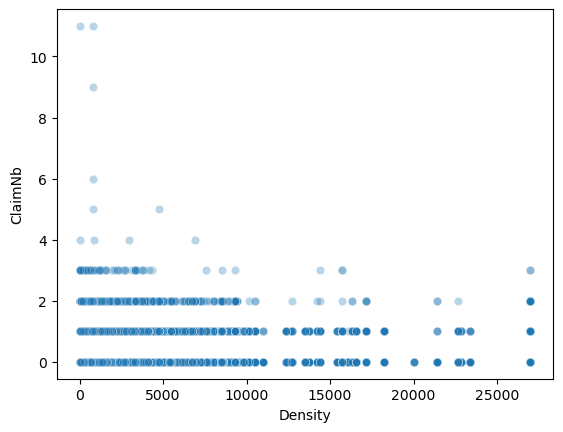

In [9]:
sns.scatterplot(x=df["Density"], y=df["ClaimNb"], alpha=0.3)
#sns.scatterplot(x="Exposure", y="ClaimNb", alpha=0.3)

<Axes: xlabel='Exposure', ylabel='ClaimNb'>

Error in callback <function _draw_all_if_interactive at 0x12abdc540> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

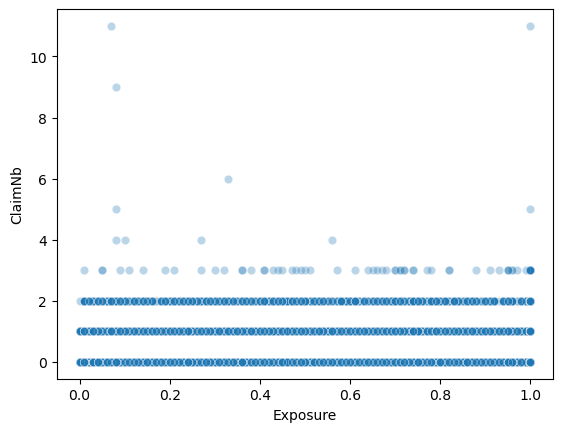

In [10]:
sns.scatterplot(x=df["Exposure"], y=df["ClaimNb"], alpha=0.3)

<Axes: xlabel='Area', ylabel='count'>

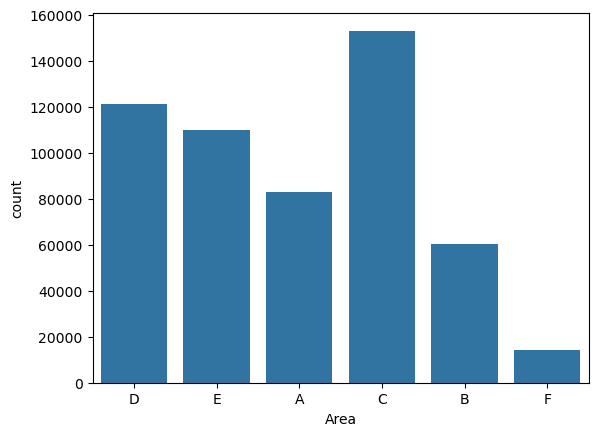

In [ ]:
sns.countplot(x=df["Area"])

<Axes: xlabel='Area'>

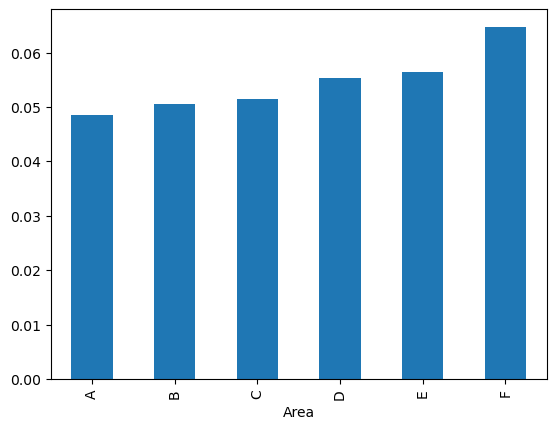

In [ ]:
df.groupby("Area")["ClaimNb"].mean().plot(kind="bar")
#Mean claims of area

<Axes: xlabel='VehBrand', ylabel='count'>

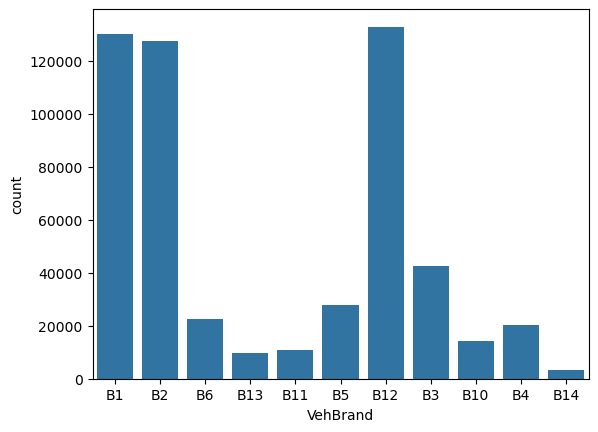

In [ ]:
sns.countplot(x=df["VehBrand"])

KeyboardInterrupt: 

In [ ]:
df["ClaimNb_cat"] = df["ClaimNb"].astype(str)

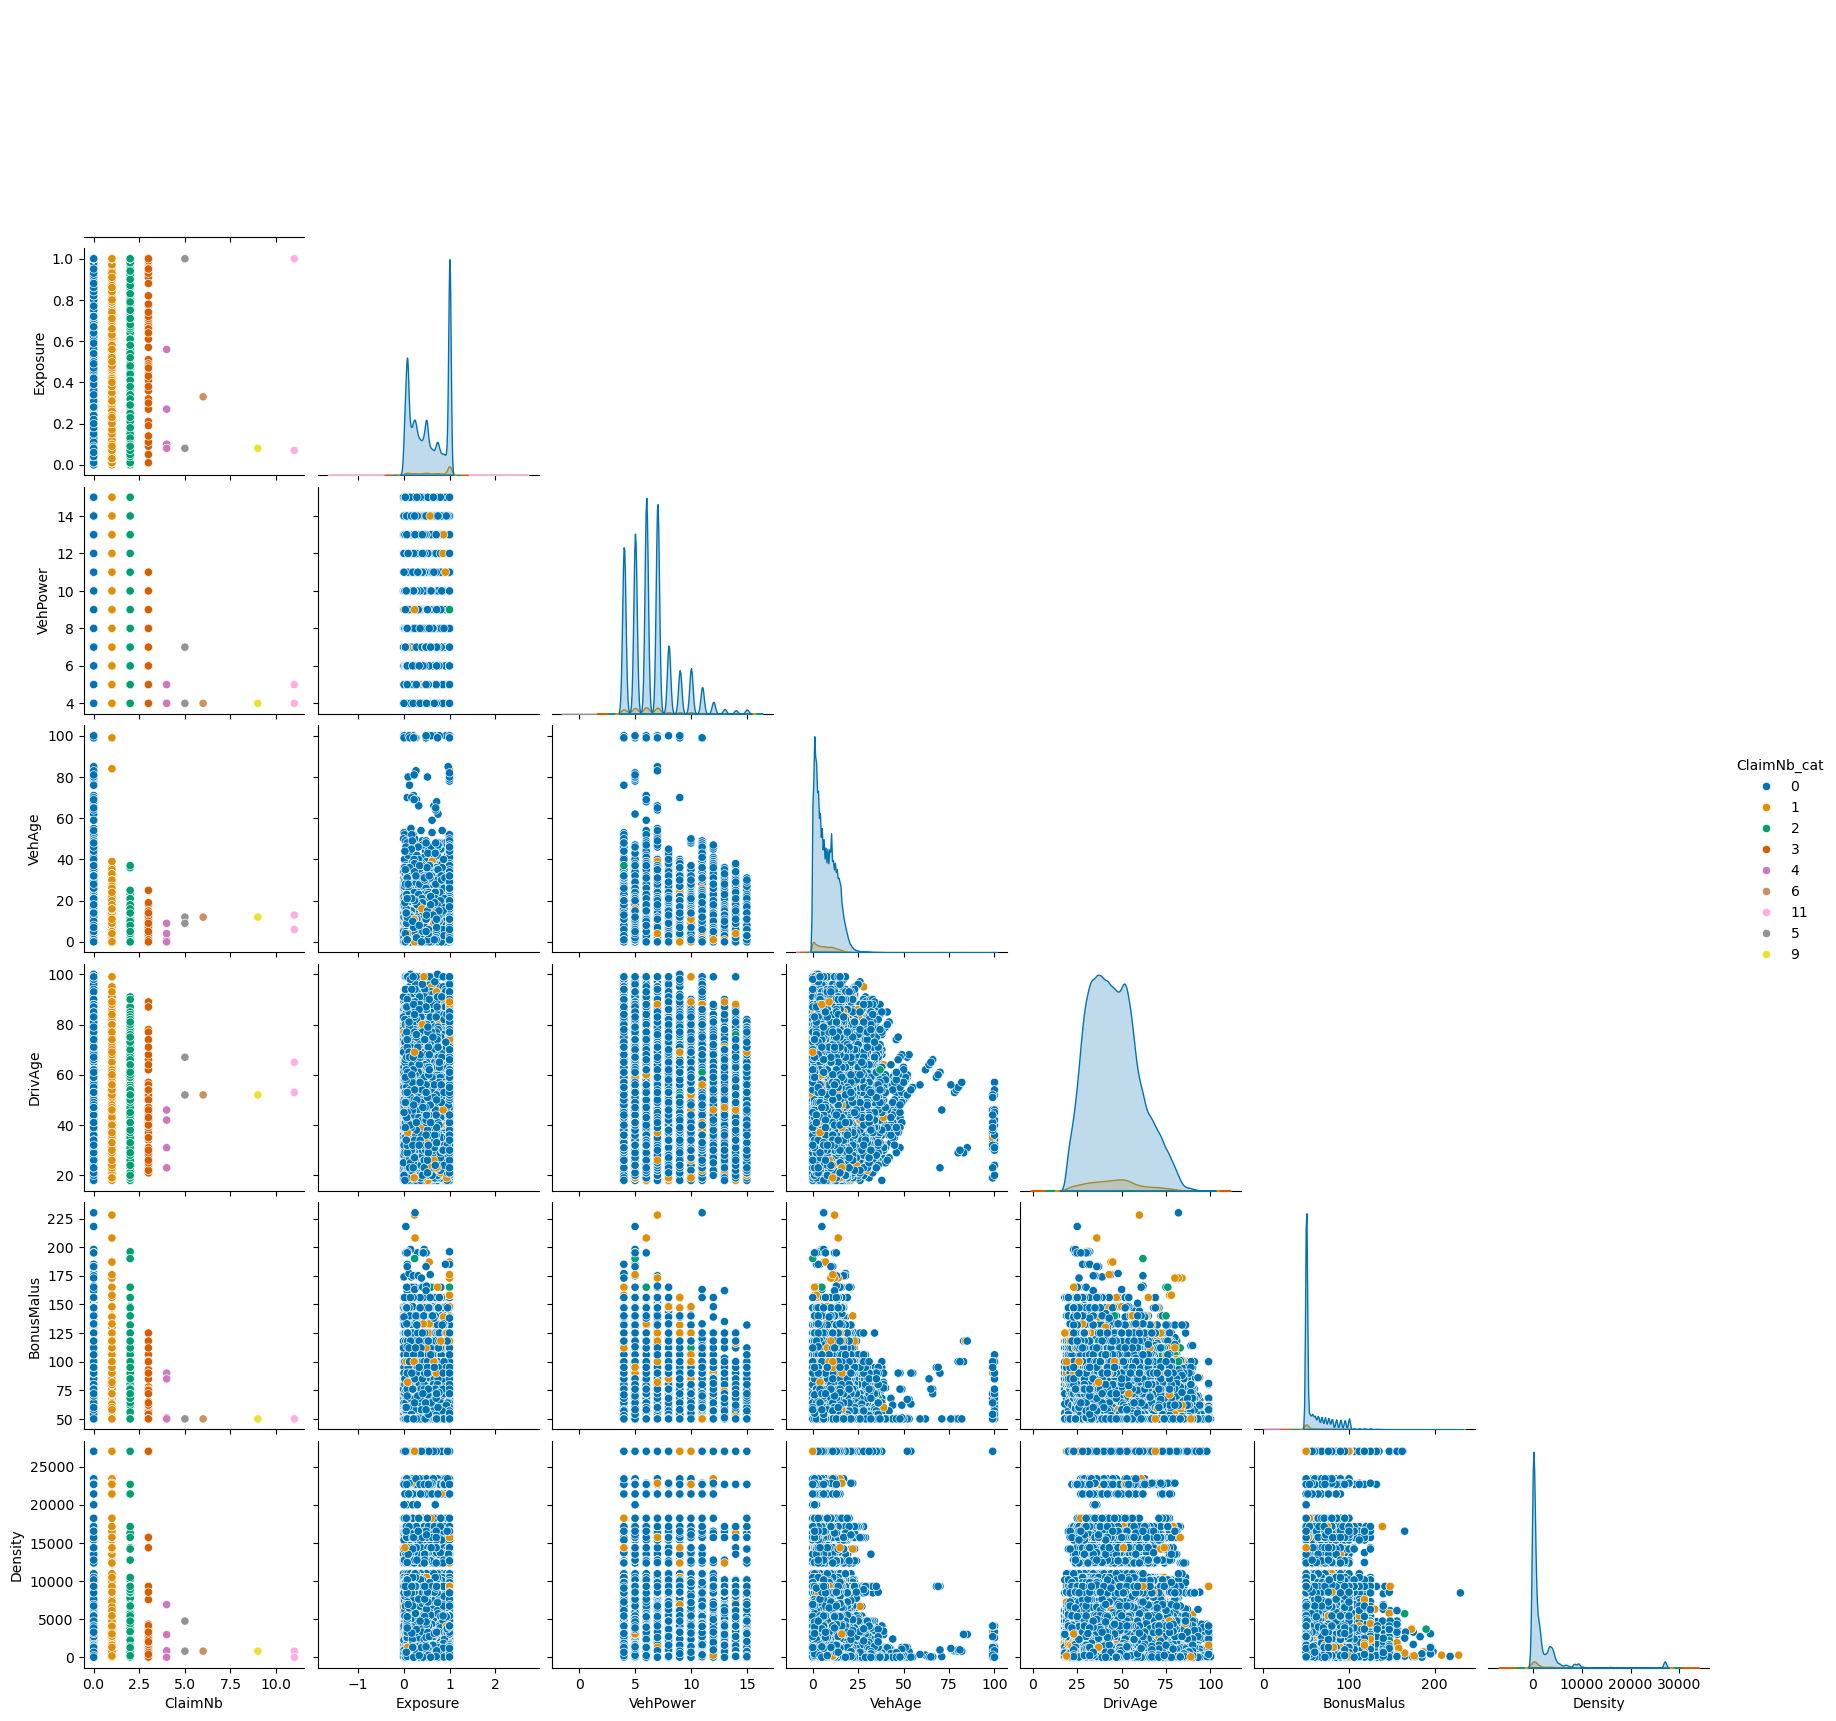

In [ ]:
sns.pairplot(df, hue="ClaimNb_cat", corner=True,palette="colorblind")

In [11]:
ct = pd.crosstab(df["VehBrand"], df["ClaimNb"])

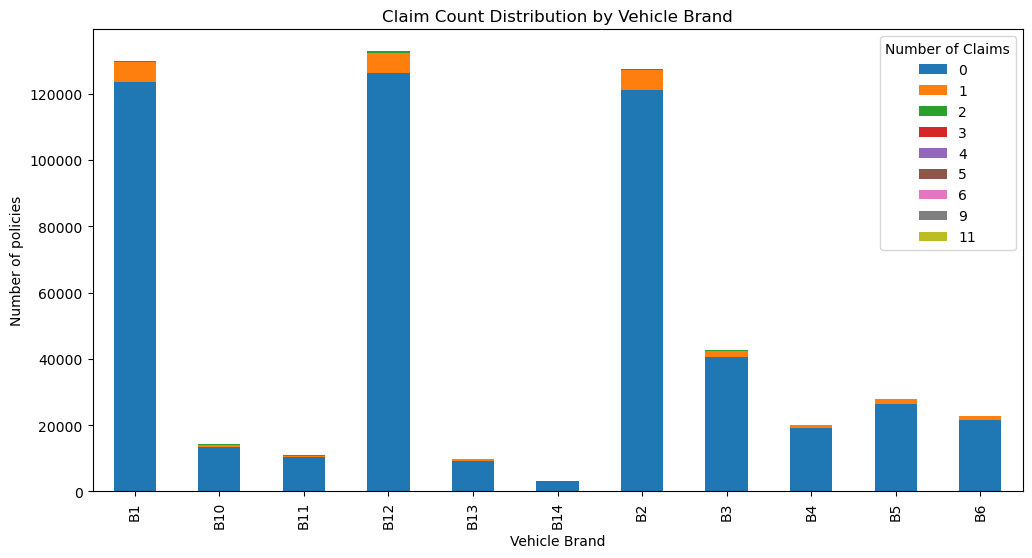

In [14]:
ct.plot(kind="bar", stacked=True, figsize=(12,6))
plt.ylabel("Number of policies")
plt.xlabel("Vehicle Brand")
plt.title("Claim Count Distribution by Vehicle Brand")
plt.legend(title="Number of Claims")
plt.show()

In [20]:
df["more_claims"] = (df["ClaimNb"]>1).astype("int")

1

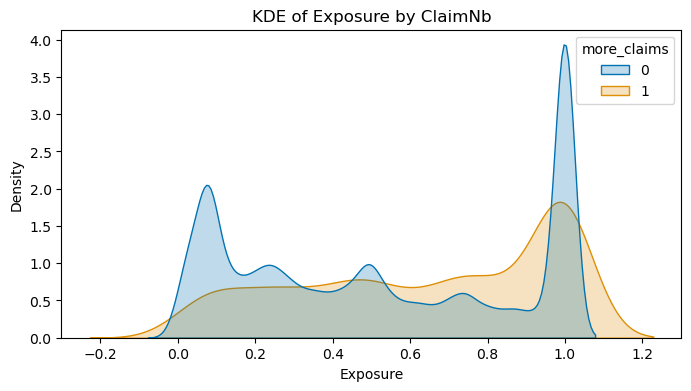

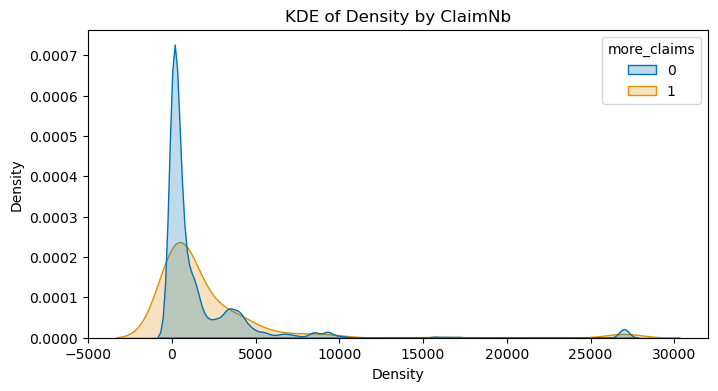

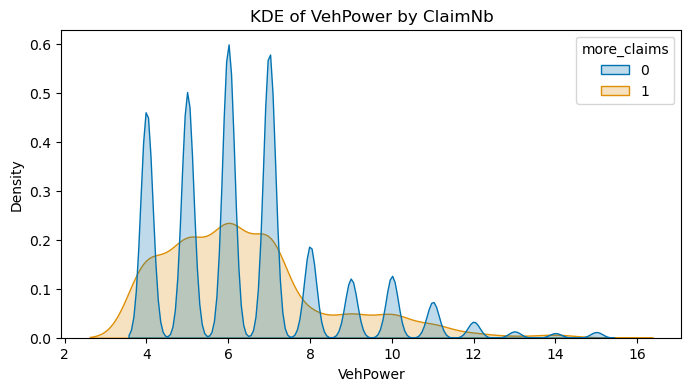

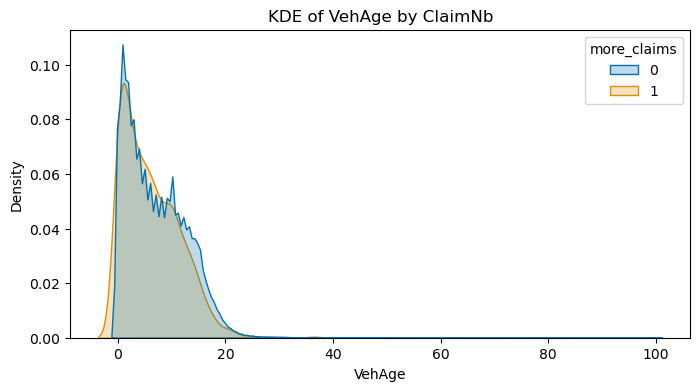

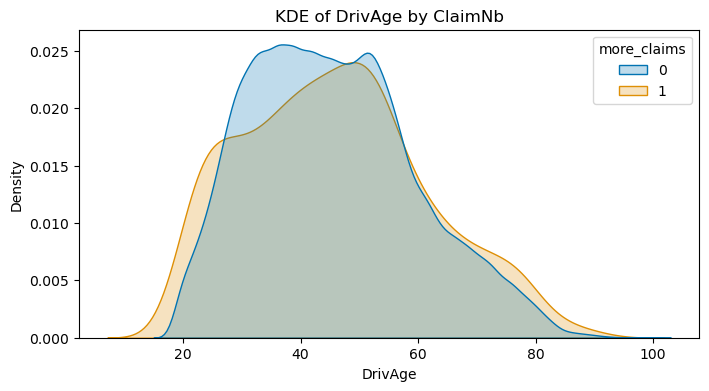

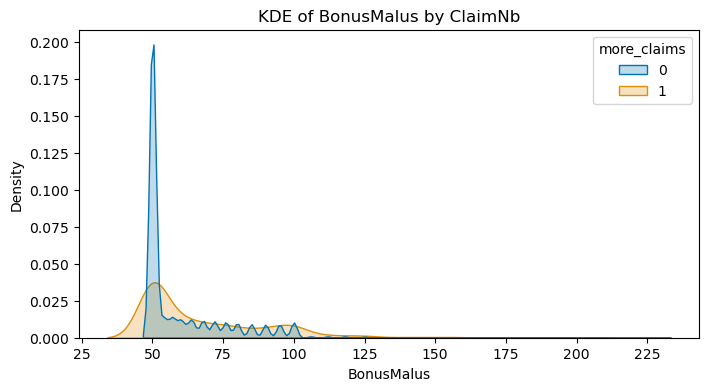

In [24]:
numeric_features = ["Exposure","Density","VehPower","VehAge","DrivAge","BonusMalus"]
for feature in numeric_features:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df, x=feature, hue="more_claims", common_norm=False, palette="colorblind", fill=True)
    plt.title(f"KDE of {feature} by ClaimNb")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()

In [16]:
df

,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,0,0.43,D,7,18,36,95,B1,Regular,1054,R24
1,0,0.10,D,7,17,80,95,B2,Regular,598,R25
2,0,0.33,E,7,3,36,76,B6,Regular,4172,R82
3,0,0.56,A,5,4,73,52,B13,Diesel,15,R24
4,0,0.27,E,8,0,37,50,B11,Diesel,3021,R53
...,...,...,...,...,...,...,...,...,...,...,...
542405,0,0.20,D,6,10,32,76,B2,Diesel,1314,R24
542406,0,0.06,D,10,14,34,60,B5,Diesel,685,R72
542407,0,0.34,C,6,8,32,95,B5,Diesel,242,R82
542408,0,0.72,E,9,7,39,72,B2,Regular,3301,R73


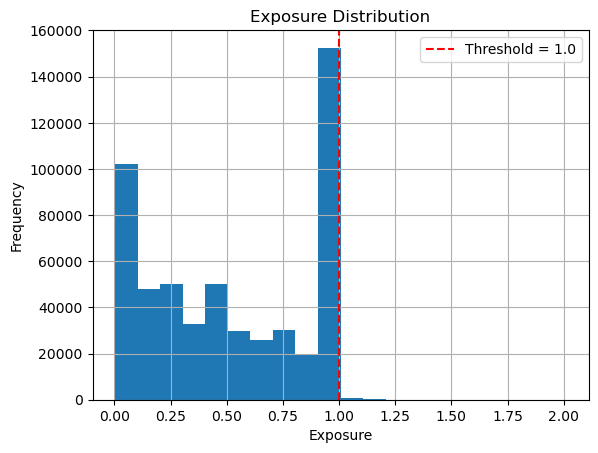

In [31]:
df1['Exposure'].hist(bins=20)
plt.axvline(1.0, color='red', linestyle='--', label='Threshold = 1.0')
plt.xlabel('Exposure')
plt.ylabel('Frequency')
plt.title('Exposure Distribution')
plt.legend()
plt.show()

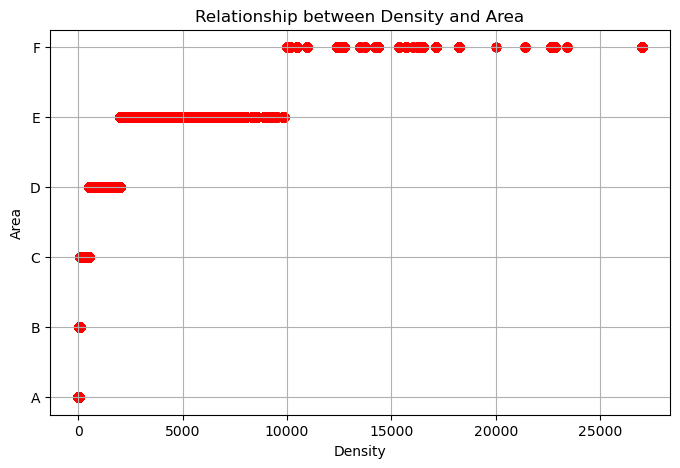

In [36]:
letters = sorted(df['Area'].unique())
letter_to_num = {letter: i for i, letter in enumerate(letters, start=1)}
df['Area_num'] = df['Area'].map(letter_to_num)

# Sort by Density to make lines connect nicely
df_sorted = df.sort_values('Density')

# Plot
plt.figure(figsize=(8,5))
plt.scatter(df_sorted['Density'], df_sorted['Area_num'], color='red')
#plt.plot(df_sorted['Density'], df_sorted['Area_num'], color='blue', linestyle='--')
plt.yticks(list(letter_to_num.values()), list(letter_to_num.keys()))
plt.xlabel('Density')
plt.ylabel('Area')
plt.title('Relationship between Density and Area')
plt.grid(True)
plt.show()